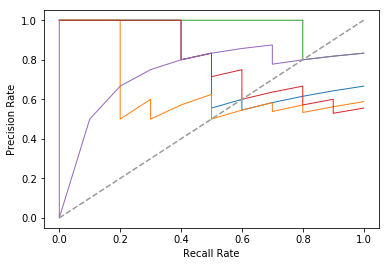

In [5]:
import numpy as np ,pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets,linear_model
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve
 
iris = datasets.load_iris()
X = iris.data
y = iris.target
X,y = X[y!=2],y[y!=2]# 去掉了label为2，label只能二分才可以
n_samples,n_features = X.shape
random_state = np.random.RandomState(0)
X = np.c_[X,random_state.randn(n_samples,200*n_features)]
kfold = StratifiedKFold(n_splits=5) # 使用5折交叉验证，并且画ROC曲线
cv = kfold.split(X,y)

classifier = svm.SVC(kernel="linear",probability=True,random_state=random_state) 
for i,(train,test) in enumerate(cv): # 通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分
    probas_ = classifier.fit(X[train],y[train]).predict_proba(X[test])
    precision,recall,thresholds = precision_recall_curve(y[test],probas_[:,1])# 最重要的函数：通过precision_recall_curve()函数，求出recall，precision，以及阈值
    plt.plot(recall,precision,lw=1)

plt.plot([0,1],[0,1],'--',color=(0.6,0.6,0.6),label="Luck")   # 画对角线 
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("Recall Rate")
plt.ylabel("Precision Rate")
plt.show()

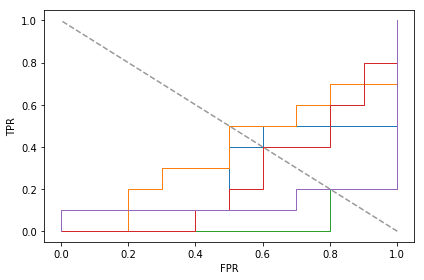

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X,y = X[y!=2],y[y!=2]# 去掉了label为2，label只能二分才可以
n_samples,n_features = X.shape
random_state = np.random.RandomState(0)
X = np.c_[X,random_state.randn(n_samples,200*n_features)]
kfold = StratifiedKFold(n_splits=5) # 使用5折交叉验证，并且画ROC曲线
cv = kfold.split(X,y)

classifier = svm.SVC(kernel="linear",probability=True,random_state=random_state) 
for i,(train,test) in enumerate(cv): # 通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分
    probas_ = classifier.fit(X[train],y[train]).predict_proba(X[test])
    precision,recall,thresholds =roc_curve(y[test],probas_[:,1])# 最重要的函数：通过roc_curve()函数，求出TPR，FPR，以及阈值
    plt.plot(recall,precision,lw=1)

plt.plot([1,0],[0,1],'--',color=(0.6,0.6,0.6),label="Luck")   # 画对角线 
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.tight_layout()
plt.show()